#### This notebook was used to analyze the SPDR500 stock prices dataset.

## Import Modules and Dataset

In [4]:
import json
# from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open("SPY-2018-12-07-full.json") as f:
    data = json.load(f)

In [6]:
# pprint (data)

## Moving Average Calculations

In [7]:
Date, aClose = [],[]

In [8]:
for key, value in data['Time Series (Daily)'].items():
    Date.append(key)
    aClose.append(float(value['5. adjusted close']))

In [9]:
'''

# DEPRECATED: Calculates 3 day moving averages for entire list

def threeDayMovingAverageCalculator(closingPriceList):
    
    # Accepts list of closing prices, with the earliest date first.
    # List must contain at least 3 elements.
    
    threeDayMovingAverage = []
    for i in range(len(closingPriceList)-2):
        threeDayMA = ((float(closingPriceList[i]) + float(closingPriceList[i+1]) + float(closingPriceList[i+2]))/3)
        threeDayMovingAverage.append(threeDayMA)
    threeDayMovingAverage.append(0)
    threeDayMovingAverage.append(0)
    return threeDayMovingAverage
    
'''

'\n\n# DEPRECATED: Calculates 3 day moving averages for entire list\n\ndef threeDayMovingAverageCalculator(closingPriceList):\n    \n    # Accepts list of closing prices, with the earliest date first.\n    # List must contain at least 3 elements.\n    \n    threeDayMovingAverage = []\n    for i in range(len(closingPriceList)-2):\n        threeDayMA = ((float(closingPriceList[i]) + float(closingPriceList[i+1]) + float(closingPriceList[i+2]))/3)\n        threeDayMovingAverage.append(threeDayMA)\n    threeDayMovingAverage.append(0)\n    threeDayMovingAverage.append(0)\n    return threeDayMovingAverage\n    \n'

In [10]:
'''

# DEPRECATED

df1 = pd.DataFrame(
    {'Date': Date,
     'Open': Open,
     'High': High,
     'Low': Low,
     'Close': Close,
     'Volume': Volume,
     '3DMA': threeDayMovingAverage
    })
    
df1.drop(df1.index[len(df1)-2:], inplace=True)
df1 = df1.iloc[::-1]
df1.plot(x = 'Date', y = '3DMA')

'''

"\n\n# DEPRECATED\n\ndf1 = pd.DataFrame(\n    {'Date': Date,\n     'Open': Open,\n     'High': High,\n     'Low': Low,\n     'Close': Close,\n     'Volume': Volume,\n     '3DMA': threeDayMovingAverage\n    })\n    \ndf1.drop(df1.index[len(df1)-2:], inplace=True)\ndf1 = df1.iloc[::-1]\ndf1.plot(x = 'Date', y = '3DMA')\n\n"

In [11]:
def calculateLatestThreeDayMA(closingPricesList):
    return (closingPricesList[0]+closingPricesList[1]+closingPricesList[2])/3

In [12]:
threeDayMovingAverage = calculateLatestThreeDayMA(aClose)

In [13]:
def calculateLatestFifteenDayMA(closingPricesList):
    fifteenDayMovingAverage = 0
    for i in range(3, 18):
        fifteenDayMovingAverage = fifteenDayMovingAverage + closingPricesList[i]
    fifteenDayMovingAverage = fifteenDayMovingAverage/15
    return fifteenDayMovingAverage

In [14]:
fifteenDayMovingAverage = calculateLatestFifteenDayMA(aClose)

In [15]:
def calculatePercentChange(oldValue, newValue):
    return (((newValue - oldValue)/oldValue)*100)

In [16]:
percentageChange = calculatePercentChange(fifteenDayMovingAverage, threeDayMovingAverage)

In [17]:
percentageChange

0.8867405083551873

## Analysis of Results

In [18]:
percentageChangesList = []

In [19]:
for i in range(len(Date)-18):
    threeDayMovingAverage = calculateLatestThreeDayMA(aClose)
    fifteenDayMovingAverage = calculateLatestFifteenDayMA(aClose)
    percentageChange = calculatePercentChange(fifteenDayMovingAverage, threeDayMovingAverage)
    percentageChangesList.append(percentageChange)
    del aClose[0]

In [20]:
len(percentageChangesList)

5249

In [21]:
len(Date)

5267

In [22]:
Date = Date[:-18]

In [23]:
truncatedPercentChanges = percentageChangesList[:-2000]

In [24]:
truncatedDates = Date[:-2000]

In [25]:
df1 = pd.DataFrame(
    {'Date': truncatedDates,
     'PercentageChanges': truncatedPercentChanges
    })

In [26]:
df1 = df1.iloc[::-1]

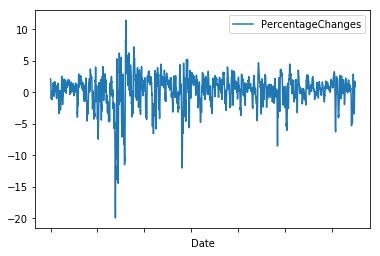

In [27]:
df1.plot(x = 'Date', y = 'PercentageChanges')

In [28]:
mean = np.mean(truncatedPercentChanges)

In [29]:
std = np.std(truncatedPercentChanges)

In [30]:
mean

0.3022197482169435

In [31]:
std

2.427990498785862

In [32]:
numberOfDays = len(truncatedDates)

In [33]:
numberOfDays

3249

In [34]:
df2 = df1.loc[df1['PercentageChanges'] < -4]

In [35]:
len(df2)

148

In [36]:
averageNumberOfAlertsPerMonth = (len(df2)/numberOfDays)*30

In [37]:
averageNumberOfAlertsPerMonth

1.3665743305632503